# 📊 Marketing Campaign Optimization — iFood (Project Dummy)

## Tujuan Utama Proyek
Optimalisasi hasil kampanye penawaran produk baru agar memperoleh profit maksimal pada bulan berikutnya, serta memahami karakteristik pelanggan yang merespons kampanye tersebut secara positif.

## 🔎 Langkah Awal: Pemeriksaan Kualitas Data
### Pertanyaan Kunci
- Apakah ada kolom yang tipe datanya tidak sesuai?
- Apakah terdapat duplikasi, data hilang (missing), atau outlier? Bagaimana cara menanganinya?
- Apakah distribusi nilai pada fitur-fitur masuk akal atau justru janggal?

## Import & Setup Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan dan gaya visualisasi
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

# Menonaktifkan peringatan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')


Tahap ini memuat library penting untuk analisis data dan visualisasi. Konfigurasi gaya visual membantu membuat grafik yang lebih informatif dan estetis.

## Memuat Dataset

In [15]:
df = pd.read_csv("C:\\portfolio\\ifood\\data_ifood_dummy.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Dataset pelanggan dimuat dari file .csv. df.head() menampilkan 5 baris pertama untuk memberikan gambaran struktur data.

In [16]:
df.shape

(2240, 28)

Digunakan untuk mengetahui jumlah baris dan kolom. Dalam hal ini, dataset memiliki 2240 entri dan 28 fitur.

## Question 1: Apakah Ada Kolom dengan Tipe Data yang Kurang Sesuai?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Fungsi info() memperlihatkan tipe data tiap kolom dan apakah ada nilai yang hilang. Dari sini terlihat:

- Kolom Income masih dalam bentuk string, padahal seharusnya numerik.
- Kolom Dt_Customer bertipe object, padahal sebaiknya diubah ke datetime.

**Eksplorasi Tipe Data dan Nilai Unik per Kolom**

In [18]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
        
    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [19]:
df.columns = df.columns.str.replace(' ', '')

In [20]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [21]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [22]:
df['Income'] = df['Income'].astype('float')

In [23]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Terlihat permasalahan ini ada karena:
- Pada kolom Income, bertipe object karena mengandung simbol dolar dan spasi. Perlu dibersihkan dan dikonversi ke numerik
- Pada kolom Dt_Customer, tipe data seharusnya datetime, bukan object

Namun, ini telah teratasi dengan baik.

## Question 2: Pemeriksaan Kualitas Data: Apakah terdapat data duplikat, nilai hilang, atau outlier? Bagaimana langkah penanganannya?

**Pemeriksaan Data Duplikat**

In [24]:
# Mengecek apakah terdapat baris duplikat dalam dataset
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 0


Hasil menunjukkan bahwa tidak ditemukan data duplikat (0), sehingga tidak diperlukan tindakan pembersihan untuk duplikasi data.

**Pemeriksaan Missing Values (Nilai Hilang)**

In [25]:
# Menghitung jumlah nilai kosong untuk tiap kolom dan mengurutkannya
missing_val = df.isnull().sum().sort_values(ascending=False)
print(missing_val)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64


Teridentifikasi bahwa kolom Income memiliki 24 nilai yang hilang, sementara kolom lainnya lengkap.

**Visualisasi Distribusi dan Outlier pada Kolom Income**

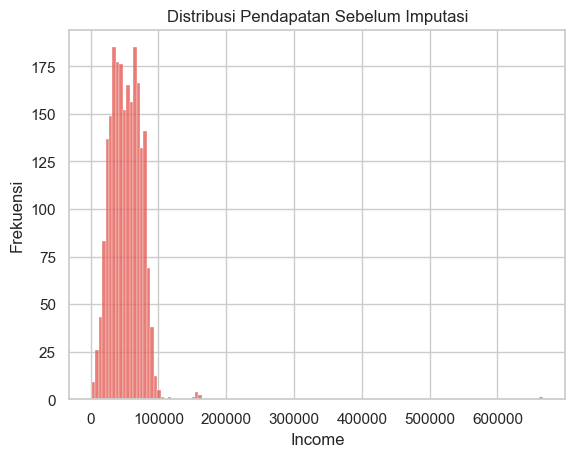

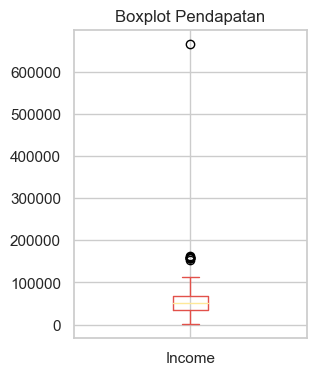

In [26]:
# Menampilkan histogram untuk distribusi nilai pendapatan
sns.histplot(df['Income'], kde=False)
plt.title("Distribusi Pendapatan Sebelum Imputasi")
plt.xlabel("Income")
plt.ylabel("Frekuensi")
plt.show()

# Menampilkan boxplot untuk mendeteksi outlier pada kolom pendapatan
df['Income'].plot(kind='box', figsize=(3, 4))
plt.title("Boxplot Pendapatan")
plt.show()


Visualisasi menunjukkan adanya outlier (nilai pencilan) pada pendapatan, serta distribusi yang tidak simetris.

**Penanganan Nilai Hilang**

In [27]:
# Menggantikan nilai kosong pada kolom 'Income' dengan nilai median

df['Income'] = df['Income'].fillna(df['Income'].median())

Menggunakan nilai median sebagai metode imputasi karena lebih tahan terhadap outlier, sehingga hasil lebih representatif.

**Seleksi Kolom Numerik untuk Analisis Outlier**

In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [29]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
               inplace=True)

**Visualisasi Boxplot Seluruh Kolom Numerik**

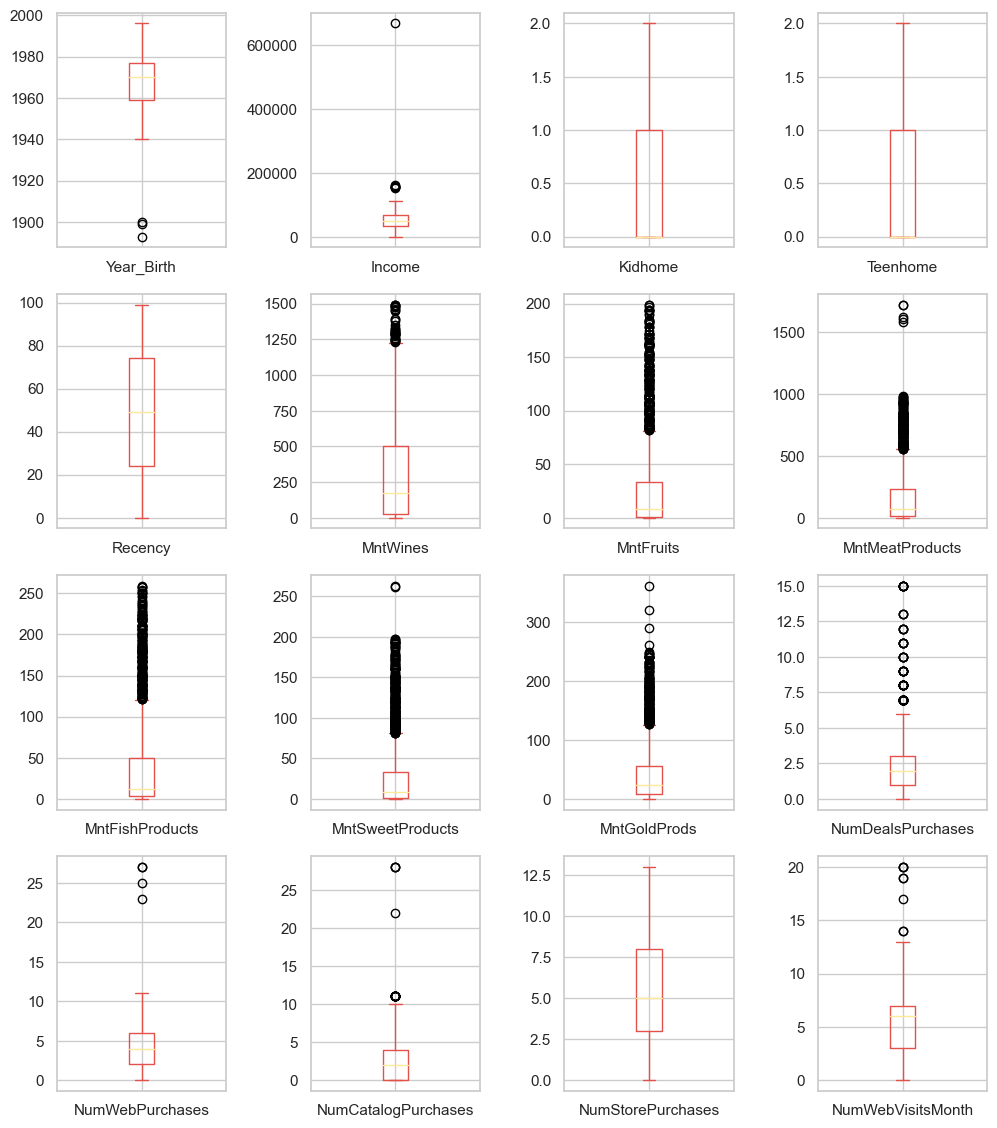

In [30]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Terlihat bahwa hampir semua variabel memiliki outlier. Ini penting untuk dipertimbangkan pada tahap pemodelan agar tidak mendistorsi hasil analisis.

**Pembersihan Data Tahun Lahir yang Tidak Masuk Akal**

In [31]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

Data dengan Year_Birth <= 1900 dianggap anomali (misal 1899), dan telah dihapus untuk meningkatkan validitas dataset.

## Question 3: Apakah ada distribusi data yang terlihat tidak masuk akal?

In [32]:
# Mendapatkan daftar kolom numerik pada dataset untuk dianalisis
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Kolom-kolom ini adalah variabel numerik utama dalam data, yang nantinya akan kita evaluasi distribusinya untuk mendeteksi adanya nilai abnormal atau outlier.

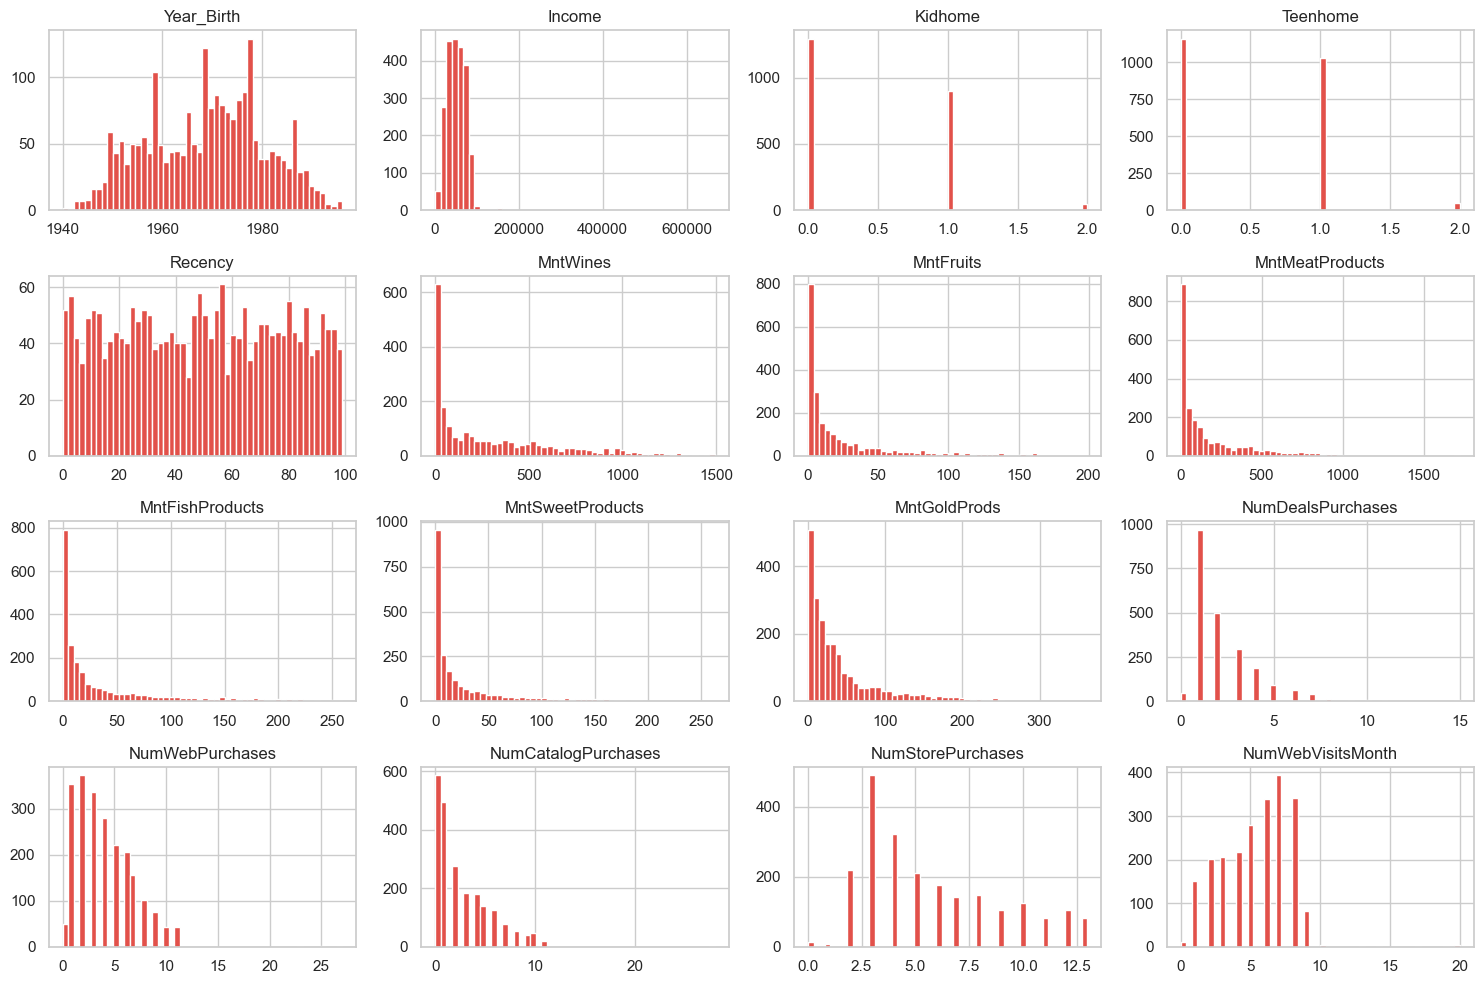

In [33]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

Histogram variabel menunjukkan distribusi data. Income memiliki beberapa nilai ekstrem yang perlu diperhatikan, sementara sebagian besar variabel pengeluaran (Mnt*) dan jumlah pembelian (Num*Purchases) sangat miring ke kanan, mengindikasikan bahwa sebagian besar pelanggan menghabiskan sedikit atau membeli dalam jumlah kecil, dengan segelintir pelanggan yang sangat aktif. Distribusi ini menunjukkan perlunya penanganan data seperti identifikasi outlier dan transformasi untuk variabel yang sangat miring guna memastikan kualitas dan kesesuaian data untuk analisis lebih lanjut atau pemodelan.

# Data Insight

In [34]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Melihat data mentah di awal dapat membantu kita memahami struktur dataset, tipe data, dan apakah ada data yang terlihat janggal.

## Menambahkan Kolom Usia Customer (Year_Birth)

In [35]:
df['Customer_Age']  = df['Dt_Customer'].dt.year - df['Year_Birth']

Menambah kolom usia customer membantu analisis perilaku berdasarkan kelompok usia.

<Axes: xlabel='Customer_Age', ylabel='Count'>

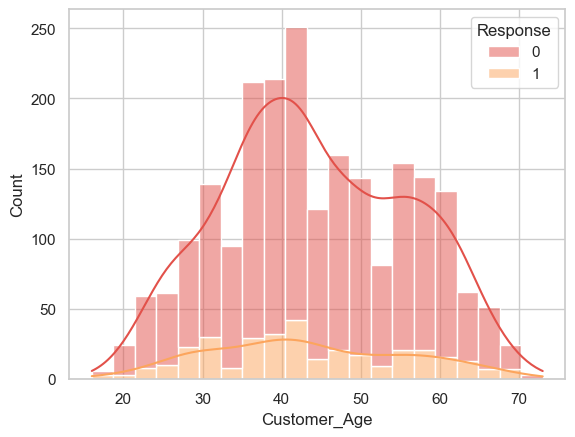

In [36]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

Histogram tumpang tindih ini menampilkan distribusi usia pelanggan berdasarkan respons kampanye. Dengan membandingkan distribusi usia pelanggan yang responsif (Response = 1) dengan yang tidak responsif (Response = 0), kita dapat mengidentifikasi segmen usia mana yang paling mungkin menanggapi kampanye pemasaran. Informasi ini krusial untuk memfokuskan strategi pemasaran, memungkinkan penargetan yang lebih efektif dan personalisasi kampanye untuk kelompok umur yang paling responsif, sehingga mengoptimalkan alokasi sumber daya.

## Pendidikan Customer (Education)

In [37]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

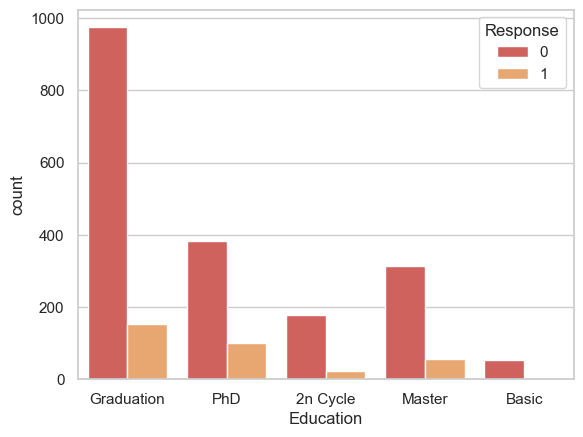

In [38]:
sns.countplot(data=df, x='Education', hue='Response')

In [39]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

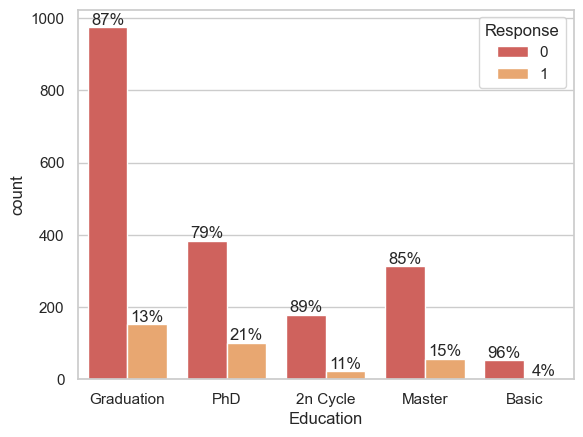

In [40]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

Berdasarkan visualisasi ini, terlihat jelas bahwa respons terhadap kampanye (Response = 1, oranye) paling banyak terjadi pada kelompok pendidikan "PhD", diikuti oleh "Graduation" dan "Master". Sebaliknya, kelompok "Basic" menunjukkan respons yang sangat rendah, dan "2n Cycle" juga memiliki respons yang minim. Ini mengindikasikan bahwa pelanggan dengan tingkat pendidikan yang lebih tinggi (Sarjana, PhD, Magister) cenderung lebih responsif terhadap kampanye, sehingga strategi pemasaran dapat lebih efektif jika ditargetkan pada segmen pendidikan ini.

**Pendapatan Berdasarkan Pendidikan dan Respons Kampanye**

(0.0, 175000.0)

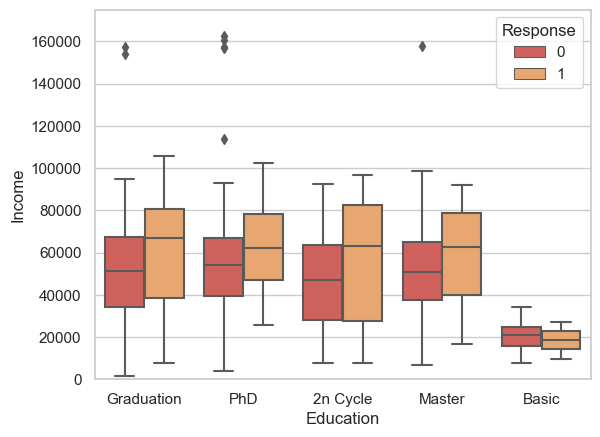

In [41]:
sns.boxplot(data =df , x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

Pendapatan yang lebih tinggi tampak berkorelasi dengan penerimaan kampanye, terutama pada kelompok pendidikan tertentu.

In [42]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


## Status Pernikahan Customer (Marital Status)

In [33]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [45]:
# Mengkategorikan status yang aneh menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

df.Marital_Status.unique()


array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [46]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

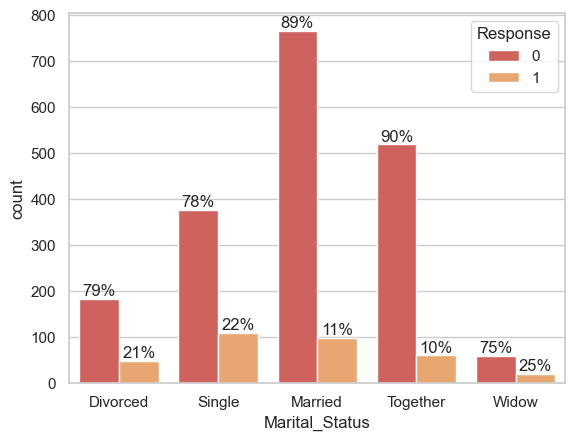

In [47]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

Ada kecenderungan jika customer tinggal sendiri/membiayai sendiri hidup cenderung membeli/menerima penawaran campaign.

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


## Jumlah Tanggungan Anak (Kidhome + Teenhome)

In [48]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

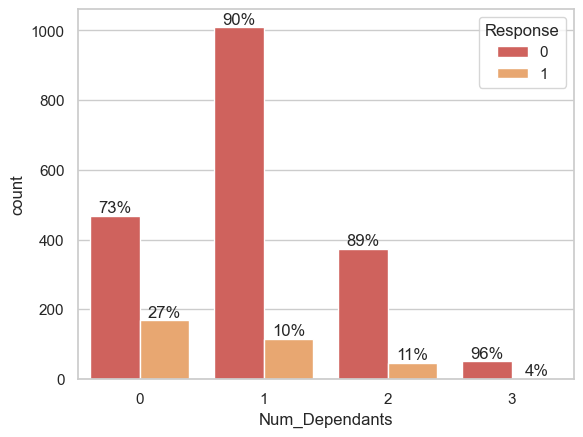

In [49]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=df)
barPerc(df, 'Num_Dependants', ax)

Pelanggan tanpa tanggungan cenderung lebih responsif terhadap kampanye.


## Tanggal Bergabung Customer (Customer Join Date)

In [50]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

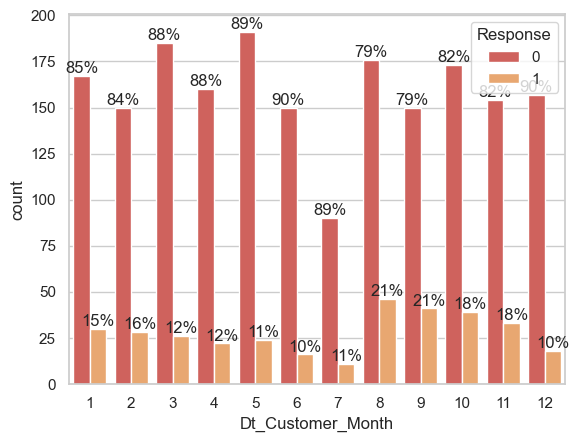

In [51]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

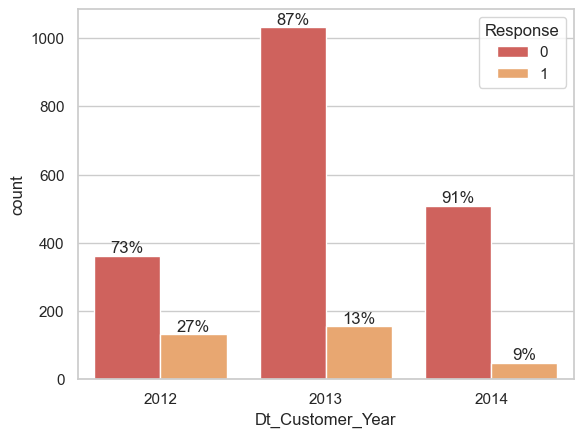

In [52]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

Semakin lama customer bergabung, semakin besar kemungkinan menerima kampanye.

In [43]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


## Waktu sejak pembelian terakhir (Recency)

<Axes: xlabel='Recency', ylabel='Count'>

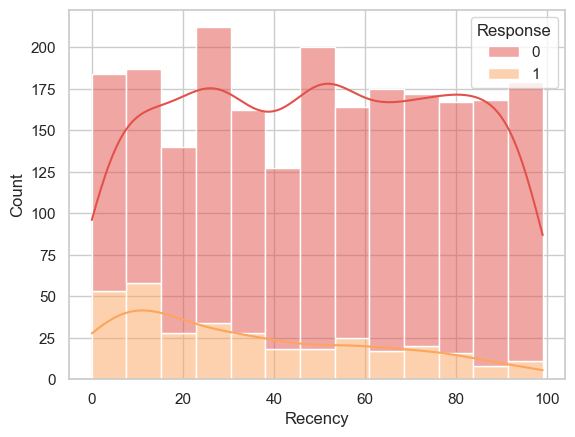

In [53]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

Customer yang baru-baru ini melakukan pembelian lebih cenderung menerima penawaran terbaru.

## Analisis Jumlah Pengeluaran untuk Produk (Amount Spent)

In [54]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [55]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


Pembelian wine dan produk daging memiliki korelasi paling tinggi dengan penerimaan kampanye.

In [57]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

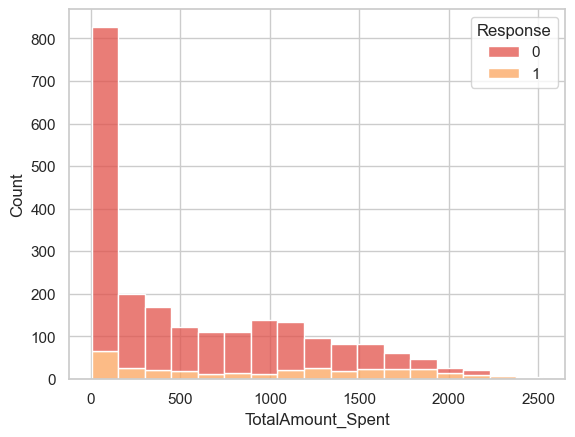

In [58]:
sns.histplot(data=df, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

Customer yang sudah menghabiskan sekitar 1000-2000 dolar lebih cenderung menerima kampanye.

In [59]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


## Fitur Pembelian (Purchases)

In [60]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
purchase_feature.append('Response')

In [61]:
df[purchase_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


Hasil korelasi antara variabel-variabel ini dengan Response (apakah konsumen merespons kampanye pemasaran terakhir) menunjukkan bahwa NumCatalogPurchases memiliki korelasi tertinggi sebesar 0.2209. Sementara itu, NumDealsPurchases hanya memiliki korelasi 0.0019, yang menunjukkan bahwa adanya penawaran diskon tidak berpengaruh signifikan terhadap respons pelanggan.

In [62]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchases'] = df[purchase_feature].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

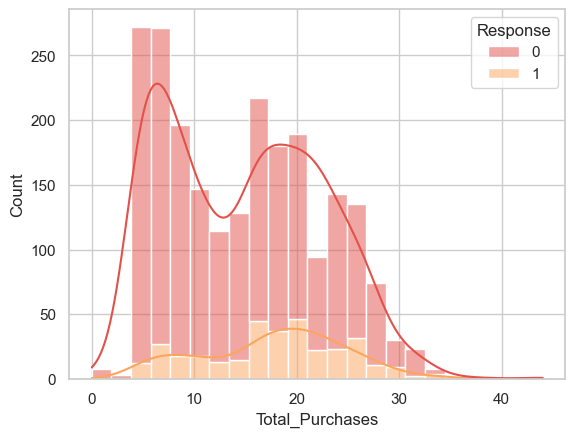

In [63]:
sns.histplot(data=df, kde=True, x='Total_Purchases', hue='Response', multiple='stack')

Tidak terdapat pola distribusi yang jelas atau pemisahan yang signifikan antara pelanggan yang merespons dan yang tidak. Hal ini diindikasikan oleh histogram bertumpuk yang memperlihatkan tumpang tindih antara dua kategori respon.

## Kunjungan Situs Web (NumWebVisitsMonth)

In [64]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


Frekuensi kunjungan bulanan ke situs web tidak memiliki hubungan linear yang berarti terhadap keputusan pelanggan dalam merespons kampanye pemasaran.

In [65]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


## Kampanye Sebelumnya (Previous Campaign)

In [66]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [67]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


Korelasi ini menunjukkan bahwa pelanggan yang telah merespons kampanye-kampanye sebelumnya cenderung lebih mungkin merespons kampanye yang terbaru. Oleh karena itu, riwayat respons terhadap kampanye masa lalu menjadi indikator prediktif yang kuat.

## Keluhan Pelanggan (Complain)

In [68]:
df[['Complain', 'Response']].corr()[['Response']]

,Response
Complain,0.000185
Response,1.000000


Korelasi yang sangat rendah ini menunjukkan bahwa riwayat keluhan tidak mempengaruhi kemungkinan pelanggan dalam merespons kampanye pemasaran terbaru. Dalam konteks ini, loyalitas atau ketidakpuasan tidak tercermin secara signifikan melalui Response.

## Negara Asal (Country)

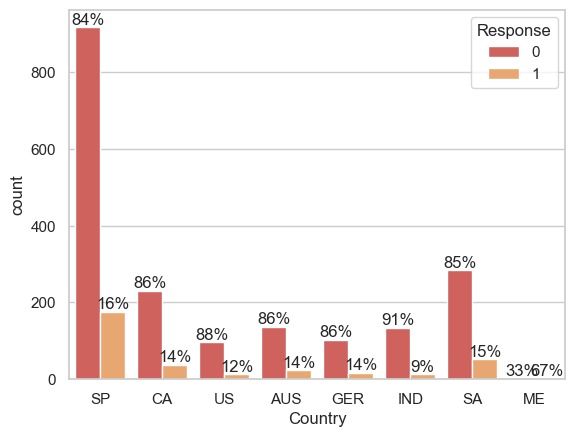

In [69]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

Pelanggan dari Mexico dan Spain lebih cenderung merespons kampanye terbaru dibandingkan pelanggan dari negara lain. Ini membuka kemungkinan adanya perbedaan efektivitas kampanye berdasarkan faktor geografis dan budaya, yang dapat dimanfaatkan dalam segmentasi pasar atau strategi personalisasi kampanye yang lebih efektif.

# Modelling

## Data Splitting 
- Data Train = 60%
- Data Validation = 20%
- Data Test = 20%

**Membaca Dataset**

In [71]:
df = pd.read_csv("C:\\portfolio\\ifood\\data_ifood_dummy.csv")
df.shape

(2240, 28)

**Membagi Data: Train, Validation, Test**

In [73]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

- Data dibagi dengan proporsi: 60% train, 20% validasi, dan 20% testing.
- Pembagian dilakukan sebelum preprocessing untuk mencegah data leakage.

In [74]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [75]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

In [76]:
# df_train
# df_valid
# df_test

# Preprocessing

## Numeric Preprocessing

**Membersihkan Nama Kolom dari Spasi**

In [81]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

Nama kolom diformat ulang agar tidak ada spasi, yang dapat mengganggu saat pemanggilan fitur dalam kode.

**Membersihkan Kolom ‘Income’**

In [82]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')

df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

AttributeError: Can only use .str accessor with string values!

Kolom Income diubah dari format string (karena adanya simbol $ dan koma) menjadi format numerik (float) agar dapat digunakan dalam analisis kuantitatif.

**Konversi Tipe Data Tanggal**

In [83]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

Tanggal pelanggan mulai menjadi customer dikonversi menjadi format datetime untuk manipulasi waktu.

**Menangani Missing Value pada 'Income'**

In [84]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

Nilai kosong pada pendapatan diisi dengan nilai median. Pendekatan ini mengurangi pengaruh outlier.

**Menghapus Data Tidak Valid pada Kolom Tahun Lahir**

In [85]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

Observasi dengan tahun lahir tidak wajar (misal: <1900) dihapus karena dianggap noise atau error input.

**Menambahkan Fitur Baru: Usia Pelanggan**

In [86]:
df_train['Customer_Age']  = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age']  = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age']  = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

Fitur baru Customer_Age dihitung sebagai selisih antara tahun pendaftaran dan tahun lahir.

**Penyatuan Nilai-Nilai Marital Status yang Tidak Konsisten**

In [87]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

Kategori aneh atau tidak konvensional dalam status pernikahan disederhanakan menjadi 'Single' untuk konsistensi data.

**Menambahkan Fitur Jumlah Tanggungan Anak**

In [88]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

Fitur Num_Dependants merepresentasikan total anak dalam rumah tangga.

**Ekstraksi Informasi Bulan dan Tahun dari Tanggal Registrasi**

In [89]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

Informasi temporal dari pendaftaran diekstrak menjadi fitur baru yang bisa bermanfaat untuk analisis musiman atau tren tahunan.

**Menjumlahkan Total Pengeluaran Konsumen**

In [90]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

Semua kolom pengeluaran (misalnya MntWines, MntMeatProducts, dll.) dijumlahkan untuk menghasilkan satu fitur utama total belanja pelanggan.

**Menjumlahkan Total Frekuensi Pembelian Konsumen**

In [91]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_feature].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_feature].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_feature].sum(axis=1)

In [92]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


rekuensi semua jenis pembelian dikonsolidasikan dalam satu fitur total pembelian untuk menyederhanakan analisis perilaku belanja.

**Menentukan dan Menyimpan Semua Fitur Numerik**

In [93]:
cmp_feat = [c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [c for c in df.columns if 'Mnt' in str(c)]
num_feat = [c for c in df.columns if 'Num' in str(c)]

In [94]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year', 
                'TotalAmount_Spent', 'Total_Purchases']

In [95]:
all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

Fitur numerik dikompilasi dalam satu daftar lengkap (all_numeric_feat) agar memudahkan pemrosesan model selanjutnya seperti scaling atau feature selection.

**Menampilkan Data yang Telah Diproses**

In [82]:
display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


Dua baris pertama dari masing-masing subset data ditampilkan untuk memastikan hasil transformasi telah benar dan sesuai ekspektasi.

## Categoric Preprocessing

In [96]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


**Identifikasi Fitur Kategorikal**

In [97]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

Tiga fitur kategorikal utama dipilih untuk diproses lebih lanjut.

**Gabungkan Fitur Numerik dan Kategorikal**

In [98]:
all_feat = categoric_feat + all_numeric_feat

**Subset Data untuk Fitur yang Dipilih**

In [99]:
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

Dataset pelatihan, validasi, dan pengujian dipangkas agar hanya mencakup fitur yang akan digunakan.

In [100]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

Categoric:
- Education (ordinal)
- Marital_Status (nominal)
- Country (nominal)

**Proses Fitur Kategorikal: Education (Ordinal)**

In [88]:
education = {'Basic':1 , 'Graduation':2, '2n Cycle':3, 'Master':4 , 'PhD':5}

In [89]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [90]:
df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


Fitur Education diproses sebagai data ordinal dengan urutan tingkat pendidikan.

**Encoding Fitur Kategorikal: One-Hot (untuk Marital_Status dan Country)**

In [102]:
from sklearn.feature_extraction import DictVectorizer

In [103]:
dv = DictVectorizer(sparse=False)

In [104]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [105]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [106]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [108]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())

In [109]:
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

Fitur nominal seperti Marital_Status dan Country dikonversi menggunakan one-hot encoding agar bisa diproses oleh algoritma machine learning.

# Modelling

- X = independent variable
- y = dependent variable (target variable) --> response 

**Siapkan Variabel Fitur dan Target**

In [110]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

In [111]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Model

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
from sklearn.metrics import roc_auc_score

In [114]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [115]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [116]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.747


Model Logistic Regression dilatih dan dievaluasi pada data validasi menggunakan metrik ROC AUC. Hasilnya menunjukkan performa dasar dari model.

### RandomForest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [119]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.872


Algoritma Random Forest diuji sebagai model alternatif. Hasil ROC AUC lebih tinggi dibandingkan model sebelumnya, menandakan peningkatan performa.

## Cek Stabilitas Model dengan Data Gabungan (Train + Validasi) / Performance Stability Check

In [120]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [121]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [122]:
y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.871


Model dilatih ulang menggunakan gabungan data pelatihan dan validasi, lalu diuji pada data test. Hasilnya tetap tinggi, menandakan model cukup stabil.

## Interpretasi Model Menggunakan SHAP (SHapley Additive exPlanations)

In [111]:
import shap

In [112]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_final)

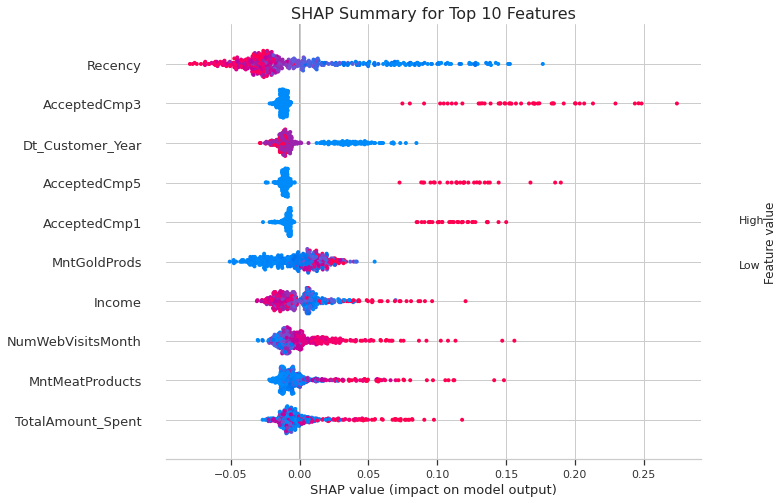

In [113]:
# plot
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shap_values[1], X_test_final, max_display=10, plot_size=[12,8])

SHAP summary plot menunjukkan kontribusi setiap fitur terhadap prediksi model. Sumbu X merepresentasikan nilai SHAP, di mana semakin ke kanan berarti fitur tersebut memberikan dampak positif terhadap probabilitas target (misalnya, campaign diterima), dan semakin ke kiri berarti dampaknya negatif. Warna titik menunjukkan nilai fitur: merah untuk nilai tinggi, biru untuk nilai rendah. Sebagai contoh, fitur recency yang bernilai rendah (titik biru) cenderung berada di sisi kanan, menunjukkan bahwa pelanggan yang baru saja melakukan pembelian lebih mungkin merespons campaign. Sebaliknya, nilai recency yang tinggi (titik merah) cenderung mengarah ke kiri, mengindikasikan kontribusi negatif terhadap probabilitas respon. Dengan demikian, plot ini memberikan pemahaman visual mengenai arah dan besarnya pengaruh masing-masing fitur terhadap output model.